# Predicting Credit Risk Using Machine Learning
## Overview
The goal is to predict using machine learning models whether a borrower will default to pay off the loan. This information is crucial for any Credit Lending company to safeguard from loss.

## Objectives
1. Understand the relationship between various features and the target variable 'y'
2. Build and evaluate atleast 3 classifier models to predict if a borrower will default to pay off the loan
3. Provide actionable insights based on model findings

## Dataset
The dataset is obtained from https://www.kaggle.com/datasets/bytadit/bank-loan-dataset-2014-2017.
The data set used for SVM is 10% random sampling of the original dataset as it is more computationally demanding

##Input Variables
Information about the columns in the dataset is available at:https://www.kaggle.com/datasets/bytadit/bank-loan-dataset-2014-2017, in dictionary.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression


In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# path_to_data = '/content/gdrive/My Drive/Practical_Application_3'
# data_dictionary = pd.read_csv('/content/gdrive/MyDrive/Capstone/dictionary.csv')


Mounted at /content/gdrive


In [3]:
#data_dictionary = pd.read_csv('/kaggle/input/bank-loan-dataset-2014-2017/loan_data/dictionary.csv')
data_dictionary = pd.read_csv('/Capstone_Project/Data/dictionary.csv')

### Data Dictionary

In [4]:
data_dictionary.drop(columns='desc_indo',inplace=True)


In [5]:
data_dictionary

,feature,desc_en
0,_rec,The total amount committed by investors for th...
1,acc_now_delinq,The number of accounts on which the borrower i...
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
155,total_cu_t,Number of finance trades
156,total_il_high_credit_limit,Total installment high credit/credit limit
157,totalAcc,The total number of credit lines currently in ...
158,totalBalExMort,Total credit balance excluding mortgage


To reduce the processing time, only using 5% of the original dataset

In [6]:
#data_loan = pd.read_csv('/content/gdrive/MyDrive/Capstone/loan_data/loan_data_2007_2014.csv')
#data_bank = pd.read_csv('data/loan_data_2007_2014.csv',header=None)

In [7]:
#data_loan.shape

(466285, 75)

In [8]:
#data_loan = data_loan.sample(frac=0.05, random_state=42)

In [9]:
#data_loan.shape

(23314, 75)

In [10]:
#data_loan.to_csv('/content/gdrive/MyDrive/Capstone/data_sampled_05.csv',index=False)

In [11]:
#data_loan.to_csv('/Capstone_Project/Data/data_sampled_05.csv',index=False)
data_loan = pd.read_csv('/Capstone_Project/Data/data_sampled_05.csv')

# Exploratory Data Analysis (EDA)

In [12]:
data_loan.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
362514,362514,19677589,21900299,32500,32500,32500.0,60 months,14.99,773.01,C,...,NaN,NaN,NaN,NaN,NaN,NaN,25100.0,NaN,NaN,NaN
288564,288564,29755527,32278795,11000,11000,11000.0,60 months,20.99,297.53,E,...,NaN,NaN,NaN,NaN,NaN,NaN,24000.0,NaN,NaN,NaN
213591,213591,1343334,1588314,30000,30000,30000.0,36 months,14.65,1034.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263083,263083,33131681,35775007,14400,14400,14400.0,60 months,14.49,338.74,C,...,NaN,NaN,NaN,NaN,NaN,NaN,17400.0,NaN,NaN,NaN
165001,165001,3293168,4066358,15000,15000,14900.0,36 months,8.90,476.30,A,...,NaN,NaN,NaN,NaN,NaN,NaN,8700.0,NaN,NaN,NaN


In [13]:
data_loan.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,23314.000000,2.331400e+04,2.331400e+04,23314.000000,23314.000000,23314.000000,23314.000000,23314.00000,2.331300e+04,23314.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.977100e+04,0.0,0.0,0.0
mean,232428.283692,1.301802e+07,1.453851e+07,14251.102342,14225.425710,14154.636967,13.862291,430.04304,7.315596e+04,17.178925,...,NaN,NaN,NaN,NaN,NaN,NaN,3.024924e+04,NaN,NaN,NaN
std,135001.374319,1.087432e+07,1.165773e+07,8328.184476,8318.494725,8341.770436,4.368121,244.75971,4.797387e+04,7.929317,...,NaN,NaN,NaN,NaN,NaN,NaN,3.042551e+04,NaN,NaN,NaN
min,6.000000,6.999000e+04,7.069400e+04,1000.000000,1000.000000,0.000000,5.420000,19.87000,7.500000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,115149.750000,3.676392e+06,4.527213e+06,8000.000000,8000.000000,8000.000000,10.990000,254.78000,4.500000e+04,11.300000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.340000e+04,NaN,NaN,NaN
50%,232018.500000,1.009502e+07,1.192467e+07,12000.000000,12000.000000,12000.000000,13.670000,376.90000,6.300000e+04,16.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.270000e+04,NaN,NaN,NaN
75%,350429.000000,2.061875e+07,2.281165e+07,20000.000000,20000.000000,19925.000000,16.590000,565.11000,8.900000e+04,22.800000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.770000e+04,NaN,NaN,NaN
max,466205.000000,3.784131e+07,4.060429e+07,35000.000000,35000.000000,35000.000000,26.060000,1396.79000,1.500000e+06,39.970000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.030500e+06,NaN,NaN,NaN


In [14]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23314 entries, 362514 to 111002
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   23314 non-null  int64  
 1   id                           23314 non-null  int64  
 2   member_id                    23314 non-null  int64  
 3   loan_amnt                    23314 non-null  int64  
 4   funded_amnt                  23314 non-null  int64  
 5   funded_amnt_inv              23314 non-null  float64
 6   term                         23314 non-null  object 
 7   int_rate                     23314 non-null  float64
 8   installment                  23314 non-null  float64
 9   grade                        23314 non-null  object 
 10  sub_grade                    23314 non-null  object 
 11  emp_title                    21861 non-null  object 
 12  emp_length                   22200 non-null  object 
 13  home_ownership 

Finding all null values in the dataset, dropping columns which have 50% or more nulls.

In [15]:
#Finding null count in columns
data_loan.isnull().sum()

,0
Unnamed: 0,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
...,...
all_util,23314
total_rev_hi_lim,3543
inq_fi,23314
total_cu_tl,23314


In [16]:
null_columns = data_loan.columns[data_loan.isnull().mean() >= 0.5]
null_columns

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [17]:
data_loan_cleaned = data_loan.drop(columns=null_columns)

In [18]:
#get all columns where all records are null, those columns can be dropped
#all_null_columns = data_loan.columns[data_loan.isnull().all()]
#all_null_columns

In [19]:
#Drop columns with all values null
#data_loan_cleaned = data_loan.drop(columns=all_null_columns)

Getting insight into the loan_status column which is the target or dependent variable

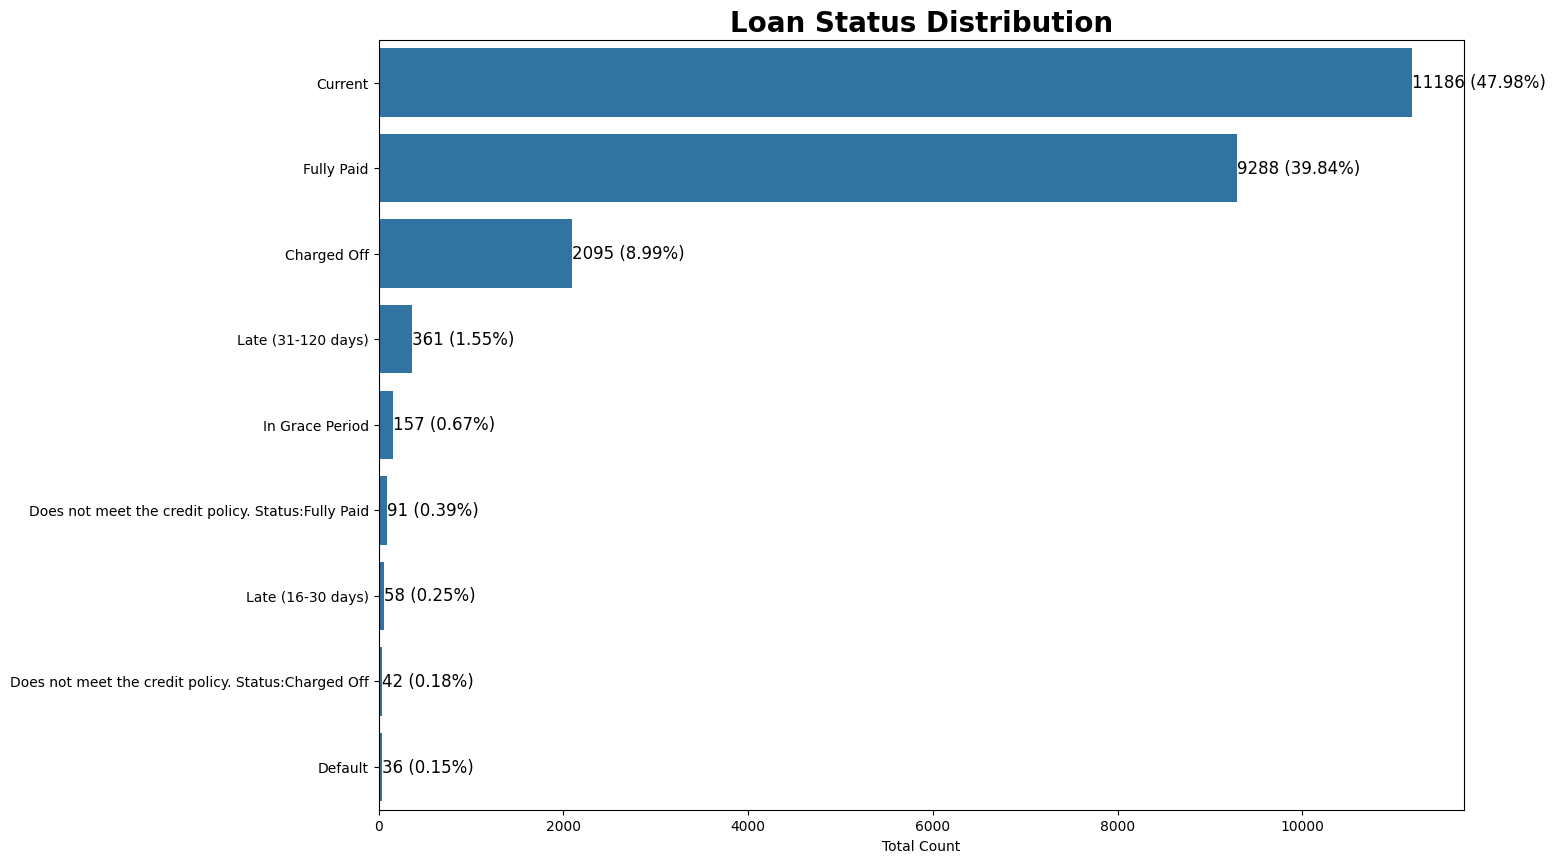

In [20]:
# Function to plot a bar plot with count and percentage annotations in descending order of percentage
def plot_bar(data_loan_cleaned, y, title, **sns_kwargs):
    # Calculate value counts and percentages
    value_counts = data_loan_cleaned[y].value_counts()
    percentage = value_counts / value_counts.sum()
    percentage = percentage.apply("{:.2%}".format)

    # Create a dataframe with total counts and percentage
    loan_stats = data_loan_cleaned.groupby(y).agg({'id':'count'}).reset_index()
    loan_stats.columns = [y, 'total']
    loan_stats['%'] = round(loan_stats['total'] * 100 / sum(loan_stats['total']), 2)

    # Sort the DataFrame by percentage in descending order
    loan_stats = loan_stats.sort_values(by='%', ascending=False)

    # Create the bar plot
    plt.figure(figsize=(14, 10))
    # Define the font style
    font = dict(size=20, weight="bold")
    plt.title(title, fontdict=font)
    sns.barplot(x=loan_stats['total'], y=loan_stats[y], **sns_kwargs)

    # Annotating each bar with total and percentage
    for i in range(len(loan_stats)):
        plt.text(loan_stats['total'].values[i], i, f"{loan_stats['total'].values[i]} ({loan_stats['%'].values[i]}%)",
                 va='center', fontdict=dict(fontsize=12))

    # Show the plot
    plt.ylabel("")
    plt.xlabel("Total Count")
    plt.show()

    # Print loan stats as a table
    #print(loan_stats)

# Call the plot function
plot_bar(data_loan_cleaned, 'loan_status', "Loan Status Distribution")

# Feature Engineering

The target variable has to be a binary classifier meaning - will the borrower default or not default.  To get to a binary value, we need to categorize the loan_status into good/ bad/ ambiguous or neutral(cannot be determined if good or bad) and then equate the good and bad to 1 and 0 respectively

In [21]:
data_loan_cleaned['loan_status'].value_counts()

,count
loan_status,
Current,11186
Fully Paid,9288
Charged Off,2095
Late (31-120 days),361
In Grace Period,157
Does not meet the credit policy. Status:Fully Paid,91
Late (16-30 days),58
Does not meet the credit policy. Status:Charged Off,42
Default,36


In [22]:
#Current and In Grace Period statuses are ambiguous and can go either way, default or fully paid, hence categorizing them as neutral
Neutral = ['Current','In Grace Period']
Good = ['Fully Paid','Does not meet the credit policy. Status:Fully Paid']
Bad = ['Charged Off','Late (31-120 days)','Default','Late (16-30 days)','Does not meet the credit policy. Status:Charged Off']

Creating a new column final_loan_status which will have the above 3 categories for the loan_status

In [23]:
data_loan_cleaned['final_loan_status'] = data_loan_cleaned['loan_status'].apply(lambda x: 'Neutral' if x in Neutral else ('Good' if x in Good else 'Bad'))



In [24]:
data_loan_cleaned['final_loan_status'].value_counts()

,count
final_loan_status,
Neutral,11343
Good,9379
Bad,2592


Since the category Neutral cannot help in deciding if it was a good or a bad loan, hence only considering the data for good and bad

In [25]:
data_loan_cleaned_new = data_loan_cleaned[data_loan_cleaned['final_loan_status'].isin(['Good', 'Bad'])]

Creating the binary target variable from final_loan_status

In [26]:
data_loan_cleaned_new['target'] = data_loan_cleaned_new['final_loan_status'].apply(lambda x: 1 if x == 'Good' else 0)

In [27]:
#drop columns like unnamed and member_id which has no use for analysis
data_loan_cleaned_new.drop(columns = ['Unnamed: 0', 'id', 'member_id'],axis=1,inplace=True)


In [28]:
#data_loan_cleaned_new.to_csv('/content/gdrive/MyDrive/Capstone/data_loan_cleaned_new.csv',index=False)

ID columns have been dropped.

Columns with 50% or more null values have been dropped from the data set to simplify the dataset.

The a binary target variable has been created using the original loan_status column.

Now plot to take a closer look at the relation between the target variable and the numeric fields.

In [29]:
#Get all the numeric columns, policy_code not needed for analysis hence dropped
numeric_columns = data_loan_cleaned_new.select_dtypes(include=['number'])
numeric_columns = numeric_columns.drop(columns=['policy_code'])
numeric_columns.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'target'],
      dtype='object')

In [30]:
correlation_matrix =  numeric_columns.corr()

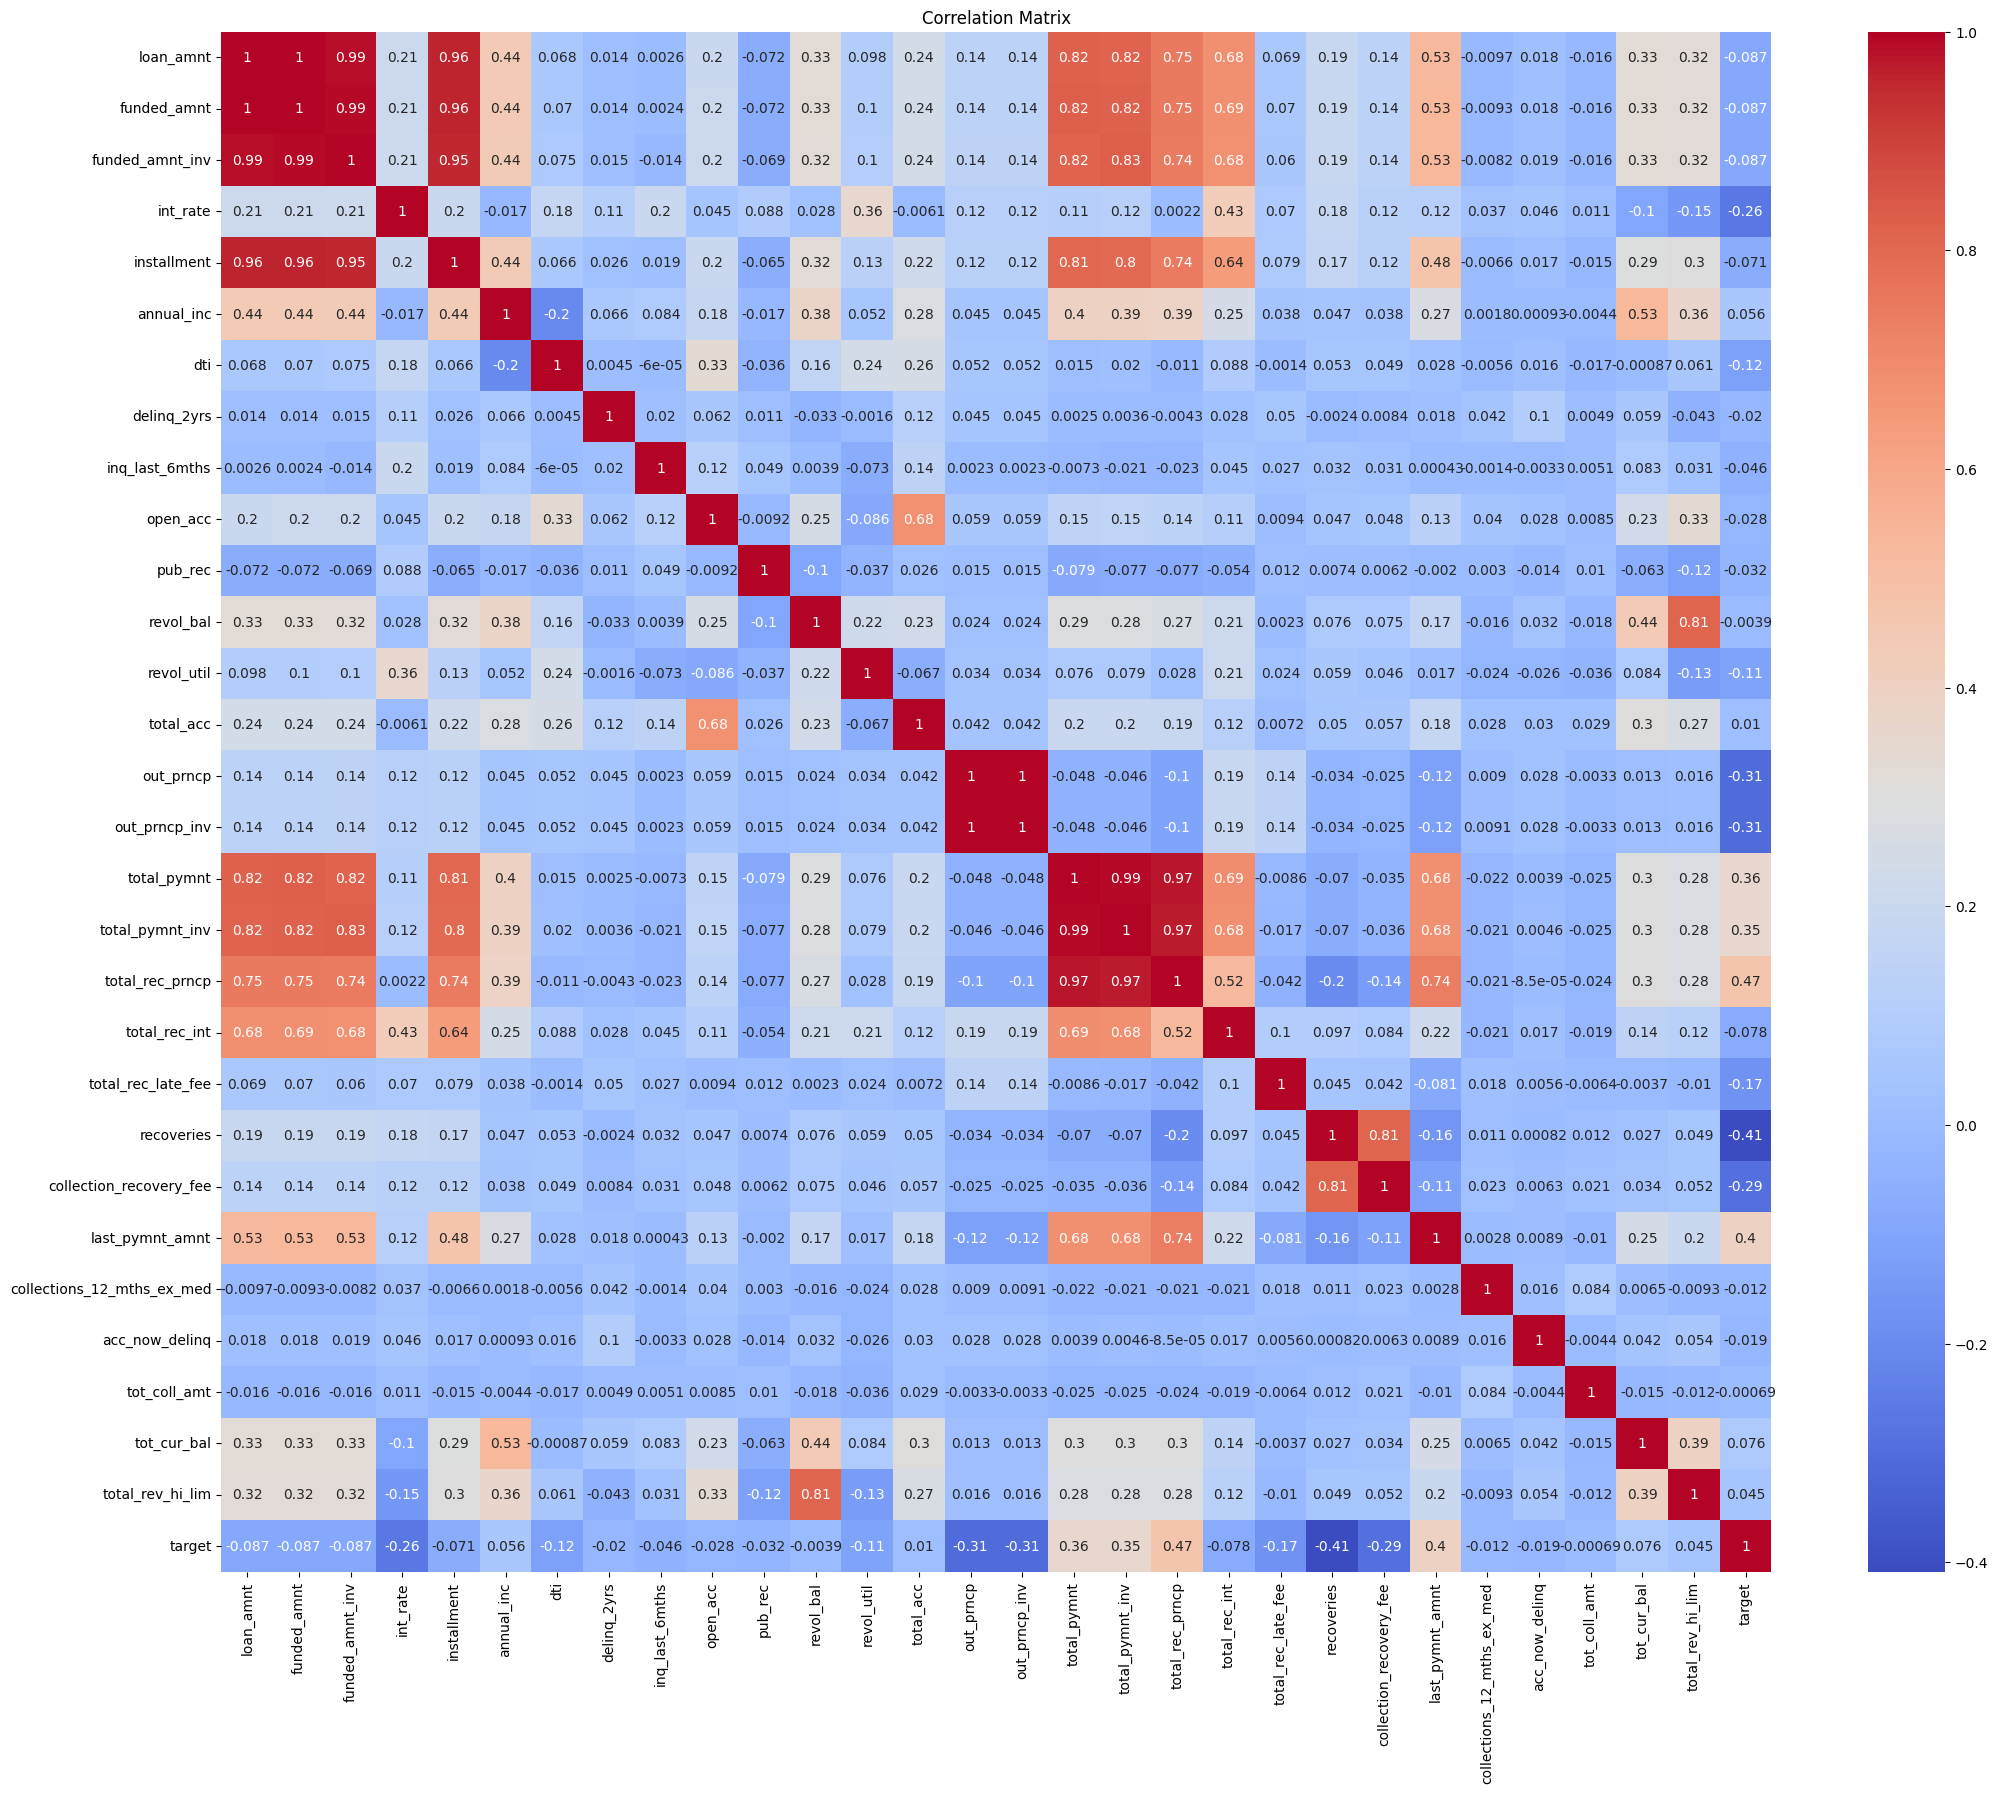

In [31]:
plt.figure(figsize=(25,20))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
#plt.savefig('/content/gdrive/MyDrive/Capstone/correlation_matrix.png')
plt.show()

## Short listing of important numerical features
Since there are several numeric features, listing the correlation to the target in the descending order of the aboslute values to decide important features

In [32]:
correlation_matrix["target"].abs().sort_values(ascending=False)

,target
target,1.000000
total_rec_prncp,0.466325
recoveries,0.408658
last_pymnt_amnt,0.397840
total_pymnt,0.355848
total_pymnt_inv,0.351343
out_prncp,0.305162
out_prncp_inv,0.305153
collection_recovery_fee,0.290743
int_rate,0.260669


In [33]:
# Finding features that have a positive corr between 0.1 and 0.99 and negetive corr between -0.99 and -0.1, and filtering out the rest. This way we are only getting the features that have moderate corr
vmin, vmax = 0.1, 0.99

#unstack the matrix from 2D to 1D
unstack_corr = correlation_matrix.unstack()
# positive correlation - this creates a boolean mask for positive correlations which fall within the vmax and vmin range
pos_corr = (unstack_corr > vmin) & (unstack_corr < vmax)
# negative correlation - this creates a boolean mask for negetive correlations which fall within the -vmax and -vmin range
neg_corr = (unstack_corr > -vmax) & (unstack_corr < -vmin)
# high correlation - this combines both pos_corr and neg_corr, so the resulting series is all that are within the threshold
high_corr = unstack_corr[pos_corr | neg_corr]
#This code helps identify features which have moderate correlation- defined by the threshold, and eliminates the features that do not fall within the significant threshold
trim_corr = high_corr.sort_values(ascending=False).unstack()
trim_corr

,funded_amnt_inv,loan_amnt,total_pymnt,total_rec_prncp,total_pymnt_inv,installment,funded_amnt,revol_bal,total_rev_hi_lim,recoveries,...,int_rate,revol_util,dti,inq_last_6mths,out_prncp,out_prncp_inv,total_rec_late_fee,delinq_2yrs,acc_now_delinq,pub_rec
loan_amnt,0.988554,NaN,0.822539,0.747939,0.817923,0.956743,NaN,0.327289,0.318816,0.190194,...,0.210802,NaN,NaN,NaN,0.140392,0.140378,NaN,NaN,NaN,NaN
funded_amnt_inv,NaN,0.988554,0.816843,0.743145,0.827039,0.951639,NaN,0.318806,0.318705,0.189469,...,0.215000,0.103591,NaN,NaN,0.143284,0.143272,NaN,NaN,NaN,NaN
total_rec_prncp,0.743145,0.747939,0.974198,NaN,0.967680,0.743022,0.750139,0.266410,0.277042,-0.198137,...,NaN,NaN,NaN,NaN,-0.101452,-0.101467,NaN,NaN,NaN,NaN
total_pymnt,0.816843,0.822539,NaN,0.974198,NaN,0.806498,0.824656,0.285771,0.276838,NaN,...,0.112936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_pymnt_inv,0.827039,0.817923,NaN,0.967680,NaN,0.801632,0.820651,0.279349,0.276775,NaN,...,0.116117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
funded_amnt,NaN,NaN,0.824656,0.750139,0.820651,0.960561,NaN,0.326671,0.318816,0.190919,...,0.212743,0.101096,NaN,NaN,0.141525,0.141511,NaN,NaN,NaN,NaN
installment,0.951639,0.956743,0.806498,0.743022,0.801632,NaN,0.960561,0.320407,0.298485,0.170942,...,0.200645,0.125432,NaN,NaN,0.120726,0.120720,NaN,NaN,NaN,NaN
total_rev_hi_lim,0.318705,0.318816,0.276838,0.277042,0.276775,0.298485,0.318816,0.807999,NaN,NaN,...,-0.152461,-0.133905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.118728
revol_bal,0.318806,0.327289,0.285771,0.266410,0.279349,0.320407,0.326671,NaN,0.807999,NaN,...,NaN,0.221409,0.162031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
collection_recovery_fee,0.136997,0.138629,NaN,-0.136585,NaN,0.122706,0.139122,NaN,NaN,0.807801,...,0.122874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# Create a mask to form the lower triangular matrix. Since the upper triangle and the lower triangle of the corr matrix have the values repeated, we only need to consider one triangle
#the below statement will pad the upper triangle with 0
mask = np.zeros_like(trim_corr)
mask[np.triu_indices_from(mask)] = True
# analyzing the high correlation from features/columns, The below statement sorts the absolute values (of both the positive and the negetive corr in the descending order)
#aff_loan = high_corr.loc["target"].abs().sort_values(ascending=False)
#aff_loan
corr_col = high_corr.loc["target"].abs().sort_values(ascending=False)
corr_col

,0
total_rec_prncp,0.466325
recoveries,0.408658
last_pymnt_amnt,0.397840
total_pymnt,0.355848
total_pymnt_inv,0.351343
out_prncp,0.305162
out_prncp_inv,0.305153
collection_recovery_fee,0.290743
int_rate,0.260669
total_rec_late_fee,0.172615


In [35]:
#Identifying highly correlated pairs
# list out the cols that are beyond the threshold, so that we can take them out of our analysis
th = 0.9

# this is getting all the columns which have very high correlation values, indicating multicollenearity
aff_coll = (high_corr.abs()
                             .loc[high_corr > th]
#                              .loc[corr_col.index, corr_col.index]
                             .sort_values(ascending=False)
)
aff_coll

,,0
loan_amnt,funded_amnt_inv,0.988554
funded_amnt_inv,loan_amnt,0.988554
total_pymnt,total_rec_prncp,0.974198
total_rec_prncp,total_pymnt,0.974198
total_pymnt_inv,total_rec_prncp,0.967680
total_rec_prncp,total_pymnt_inv,0.967680
funded_amnt,installment,0.960561
installment,funded_amnt,0.960561
loan_amnt,installment,0.956743
installment,loan_amnt,0.956743


In [36]:
#this code identifies highly correalted pairs based on the above threshold and then keeps one column from pair
#If aff_coll shows that column_A and column_B have a correlation greater than the threshold (0.9), and column_C and column_D also have a high correlation, this code ensures that:
#Either column_A or column_B is included (but not both).

left_index = aff_coll.index.get_level_values(0)
right_index = aff_coll.index.get_level_values(1)
include_cols,exclude_cols = [],[]
for left,right in zip(left_index,right_index):
  if left not in include_cols and left not in exclude_cols:
    include_cols.append(left)
  if right not in include_cols and right not in exclude_cols:
    exclude_cols.append(right)
include_cols,exclude_cols


(['loan_amnt', 'total_pymnt', 'total_pymnt_inv', 'funded_amnt'],
 ['funded_amnt_inv', 'total_rec_prncp', 'installment'])

Now build the list of numeric columns to be included in the analysis.

In [37]:
num_cols = corr_col[~corr_col.index.isin(exclude_cols)].index.to_list()
num_cols.append('target')
num_cols

['recoveries',
 'last_pymnt_amnt',
 'total_pymnt',
 'total_pymnt_inv',
 'out_prncp',
 'out_prncp_inv',
 'collection_recovery_fee',
 'int_rate',
 'total_rec_late_fee',
 'dti',
 'revol_util',
 'target']

Get all the categorical features for analysis

In [38]:
#Find all the categorical features
categorical_features = data_loan_cleaned_new.select_dtypes(include=['object'])
categorical_features.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'final_loan_status'],
      dtype='object')

In [39]:
#find the unique values for all the categorical features, so as to filter out columns with too many unique values
for feature in categorical_features:
  print(categorical_features[feature].value_counts())


term
 36 months    9391
 60 months    2580
Name: count, dtype: int64
grade
B    3663
C    3017
D    1992
A    1977
E     850
F     378
G      94
Name: count, dtype: int64
sub_grade
B3    877
B4    812
B2    730
C1    708
C2    668
B5    654
A5    592
B1    590
C3    584
C4    536
A4    526
C5    521
D1    481
D2    439
D3    419
D4    365
A3    339
D5    288
A2    261
A1    259
E1    218
E2    208
E3    166
E4    147
E5    111
F1     97
F3     80
F4     75
F2     69
F5     57
G1     37
G2     19
G3     15
G4     13
G5     10
Name: count, dtype: int64
emp_title
Manager                           83
Teacher                           76
Supervisor                        38
RN                                32
Registered Nurse                  29
                                  ..
Superintendent                     1
Bayer Material Science             1
medical science liaison            1
Cambridge Healthtech Institute     1
Department of the Army             1
Name: count, Length: 9102,

Observation from the unique counts of categorical features
1. Application_type - only 1 type Individual. The column can be dropped
2. Addr_state- too many unique values, while CA is max.
3. Zipcode - too many unique values, column can be dropped
4. purpose - Debt_consolitation seems to be the highest
5. url - too many unique values, can be dropped
6. Verification_status - verified and not verified count almost same
7. Home_ownership - MORTGAGE is max
8. emp_title - too many unique values, column can be dropped
9. emp_length - 10+years has the max count
10. term - 36, 60 months, 36 being more common

Seeing the distribution of each of the important categorical features against the final_loan_status

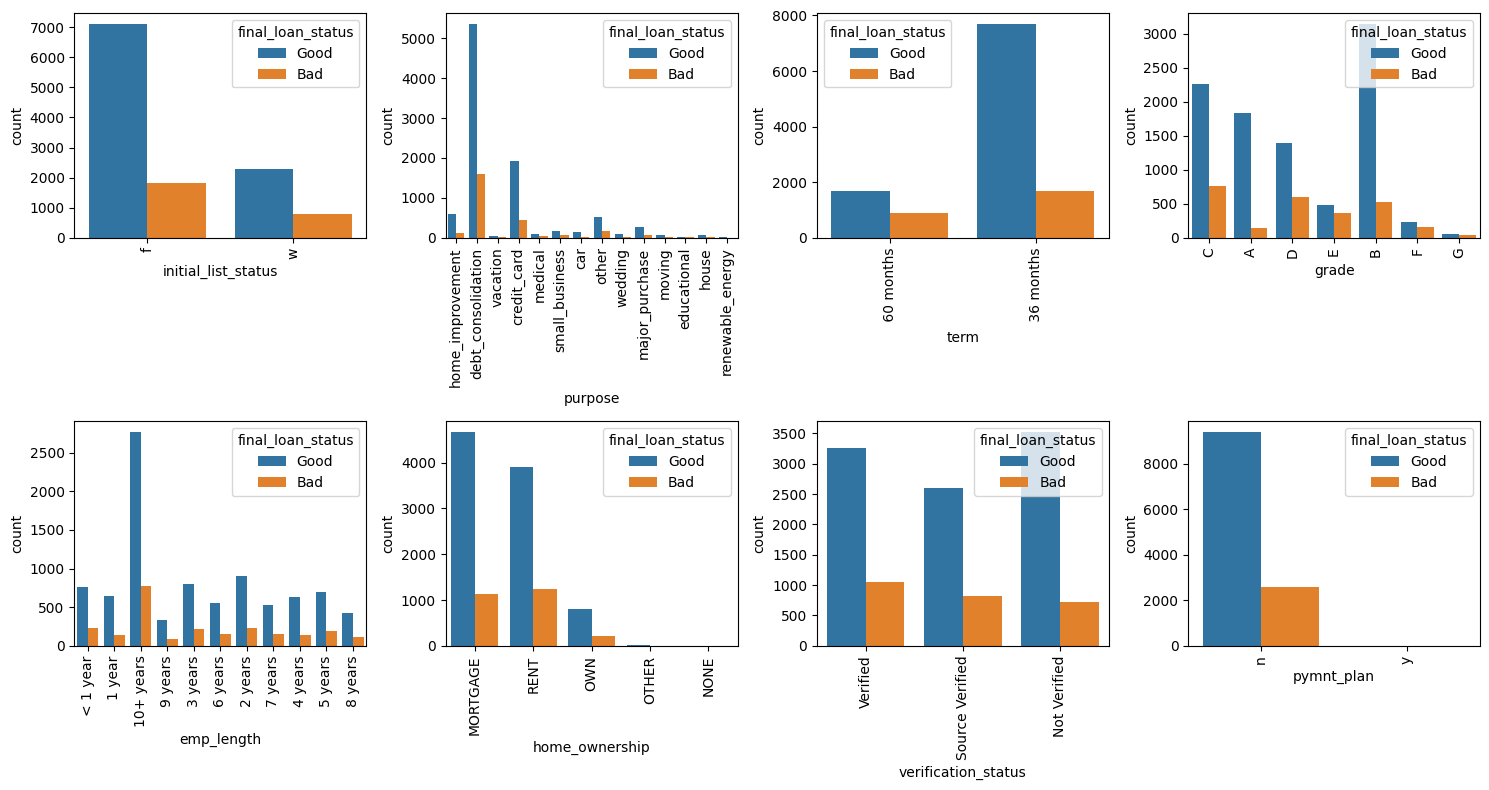

In [40]:
cat_feature_analyze = ['initial_list_status','purpose','term','grade','emp_length','home_ownership','verification_status','pymnt_plan']
#for feature in cat_feature_analyze:
#  sns.countplot(x=feature, hue=categorical_features['final_loan_status'], data=categorical_features)
#  plt.title('Relationship between Categorical Feature and Target')
#  plt.xticks(rotation=45, ha='right')
#  plt.show()

plt.figure(figsize=(15, 8))
for i in range(len(cat_feature_analyze)):
    plt.subplot(2, 4, i + 1)
    sns.countplot(x=cat_feature_analyze[i], hue='final_loan_status', data=categorical_features)
    plt.xlabel(cat_feature_analyze[i])
    plt.xticks(rotation=90)
    plt.tight_layout()


In [41]:
data_loan_cleaned_new.shape

(11971, 53)

Dropping the categorical features with too many unique value or only 1 value

In [42]:
data_loan_cleaned_new.drop(columns=['application_type','addr_state','zip_code','url','emp_title','sub_grade'],inplace=True) #dropping these fields as there are too many unique values
#data_loan_cleaned_new.shape
data_loan_cleaned_new.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'title',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'final_loan_status'],
      dtype='object')

In [43]:
#pymnt_plan= n cnt 238906, y = 7, data is extremely imbalanced, hence dropping the column
data_loan_cleaned_new.pymnt_plan.value_counts()
data_loan_cleaned_new.drop(columns='pymnt_plan',inplace=True)

In [44]:
# Ordering feature `emp_length`
length = ['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
data_loan_cleaned_new['emp_length'] = pd.Categorical(data_loan_cleaned_new['emp_length'], categories=length, ordered=True)

In [45]:
#data_loan_cleaned_new[['issue_d','last_pymnt_d','last_credit_pull_d','earliest_cr_line']].head()

In [46]:
from datetime import datetime as dt
data_loan_cleaned_new['issue_d'] = pd.to_datetime(data_loan_cleaned_new['issue_d'].apply(lambda x: dt.strptime(str(x), '%b-%y') if isinstance(x, str) else x))
data_loan_cleaned_new['last_pymnt_d'] = pd.to_datetime(data_loan_cleaned_new['last_pymnt_d'].apply(lambda x: dt.strptime(str(x), '%b-%y') if isinstance(x, str) else x))
data_loan_cleaned_new['last_credit_pull_d'] = pd.to_datetime(data_loan_cleaned_new['last_credit_pull_d'].apply(lambda x: dt.strptime(str(x), '%b-%y') if isinstance(x, str) else x))
data_loan_cleaned_new['earliest_cr_line'] = pd.to_datetime(data_loan_cleaned_new['earliest_cr_line'].apply(lambda x: dt.strptime(str(x), '%b-%y') if isinstance(x, str) else x))

The code below performs correlation analysis between date columns and the target variable (final_loan_status) using the dython library

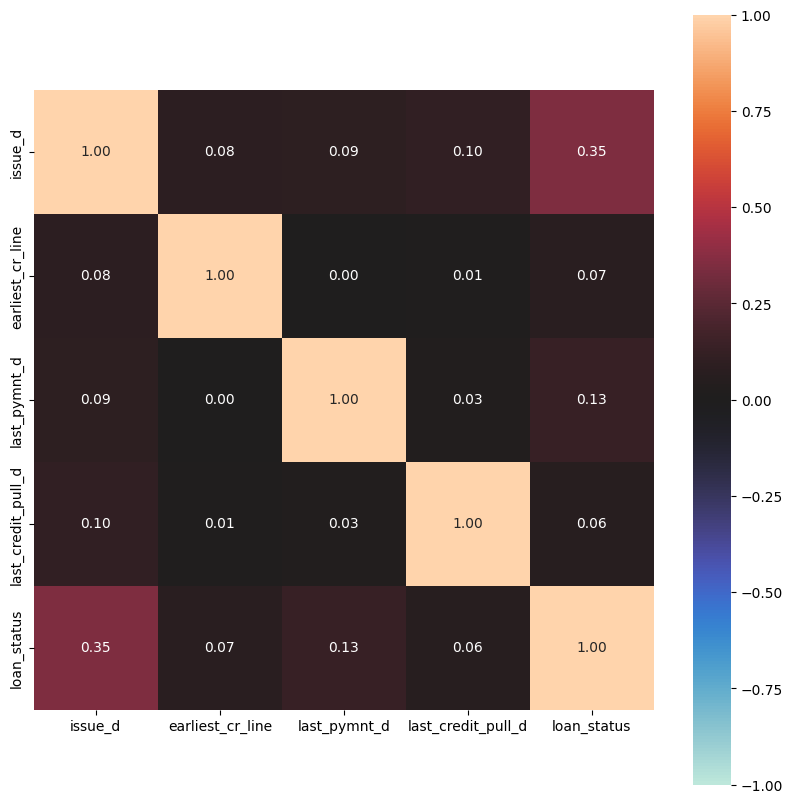

In [47]:
# Correlation between date and loan status
!pip install dython
from dython.nominal import associations
date_cols = ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"]
# Handle missing values in date columns before calculating associations
data_loan_cleaned_new[date_cols] = data_loan_cleaned_new[date_cols].fillna(pd.Timestamp.min)  # or any appropriate default timestamp
used_cols = date_cols + ["loan_status"]
complete_correlation = associations(
    data_loan_cleaned_new[used_cols],
    filename='date_correlation.png',
    figsize=(10,10)
)

In [48]:
#There is no strong correlation between dates and each date has little correlation with loan status. Lets remove the date feature that correlates less than 0.1 with the loan status
# Date features will be used
corr_date_cols = ["issue_d", "last_pymnt_d", "last_credit_pull_d"]
corr_date_cols
# Remove date features that don't have a strong correlation with loan status
unused_cols = ["earliest_cr_line"]
data_loan_cleaned_new = data_loan_cleaned_new.drop(columns=unused_cols, errors="ignore")

In [49]:
#Reducing the number of unique values in the home_ownership column by bucketing the values with smaller counts into 1 bucket
#The 'OWN', 'NONE' and 'ANY' labels on the home_ownership feature will be combined with the 'OTHER' label
data_loan_cleaned_new['home_ownership'].value_counts()
data_loan_cleaned_new.home_ownership.replace({'NONE':'OTHER','ANY':'OTHER','OWN':'OTHER'},inplace=True)
data_loan_cleaned_new.home_ownership.unique()

array(['MORTGAGE', 'RENT', 'OTHER'], dtype=object)

In [50]:
data_loan_cleaned_new.select_dtypes(include=['object']).columns

Index(['term', 'grade', 'home_ownership', 'verification_status', 'loan_status',
       'purpose', 'title', 'initial_list_status', 'next_pymnt_d',
       'final_loan_status'],
      dtype='object')

In [51]:
num_cols

['recoveries',
 'last_pymnt_amnt',
 'total_pymnt',
 'total_pymnt_inv',
 'out_prncp',
 'out_prncp_inv',
 'collection_recovery_fee',
 'int_rate',
 'total_rec_late_fee',
 'dti',
 'revol_util',
 'target']

In [52]:
data_loan_cleaned_new['target'].isnull().sum()

0

For the numerica cols, fill null values with the mean of the column

In [53]:
data_loan_cleaned_new.fillna({
    'recoveries': data_loan_cleaned_new['recoveries'].mean(),
    'last_pymnt_amnt': data_loan_cleaned_new['last_pymnt_amnt'].mean(),
    'total_pymnt': data_loan_cleaned_new['total_pymnt'].mean(),
    'total_pymnt_inv': data_loan_cleaned_new['total_pymnt_inv'].mean(),
    'out_prncp': data_loan_cleaned_new['out_prncp'].mean(),
    'out_prncp_inv': data_loan_cleaned_new['out_prncp_inv'].mean(),
    'collection_recovery_fee': data_loan_cleaned_new['collection_recovery_fee'].mean(),
    'int_rate': data_loan_cleaned_new['int_rate'].mean(),
    'total_rec_late_fee': data_loan_cleaned_new['total_rec_late_fee'].mean(),
    'dti': data_loan_cleaned_new['dti'].mean(),

}, inplace=True)

In [54]:
data_loan_cleaned_new['recoveries'].value_counts()

,count
recoveries,
0.00,10800
3822.53,2
487.31,2
10.44,2
11.34,2
...,...
916.52,1
1332.64,1
191.37,1


In [55]:
data_loan_cleaned_new[num_cols].columns

Index(['recoveries', 'last_pymnt_amnt', 'total_pymnt', 'total_pymnt_inv',
       'out_prncp', 'out_prncp_inv', 'collection_recovery_fee', 'int_rate',
       'total_rec_late_fee', 'dti', 'revol_util', 'target'],
      dtype='object')

In [56]:
# new dataframe containing only the columns to be used for prediction

prediction_df = pd.concat([data_loan_cleaned_new[num_cols],
                           data_loan_cleaned_new[corr_date_cols],
                           data_loan_cleaned_new.select_dtypes(include=['object'])], axis=1)
#since target variable is derived from loan_status and final_status, we can drop those 2 columns
prediction_df.drop(columns=['loan_status','final_loan_status'],inplace=True)
prediction_df.shape

(11971, 23)

In [57]:
prediction_df.drop(columns='title', axis=1, inplace=True)



In [58]:
data_loan_cleaned_new['next_pymnt_d'].isnull().sum()

11383

In [59]:
#since more than 90% of the data is null for next_pymnt_d, dropping this column
prediction_df.drop(columns='next_pymnt_d', axis=1, inplace=True)

In [60]:
prediction_df.shape

(11971, 21)

In [61]:
prediction_df.columns

Index(['recoveries', 'last_pymnt_amnt', 'total_pymnt', 'total_pymnt_inv',
       'out_prncp', 'out_prncp_inv', 'collection_recovery_fee', 'int_rate',
       'total_rec_late_fee', 'dti', 'revol_util', 'target', 'issue_d',
       'last_pymnt_d', 'last_credit_pull_d', 'term', 'grade', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status'],
      dtype='object')

In [62]:
cat_features = prediction_df.select_dtypes(include=['object']).columns
cat_features

Index(['term', 'grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status'],
      dtype='object')

In [63]:
full_features = prediction_df[['term', 'grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status','recoveries', 'last_pymnt_amnt', 'total_pymnt', 'out_prncp', 'out_prncp_inv', 'collection_recovery_fee', 'int_rate', 'total_rec_late_fee', 'dti', 'target']]

In [64]:
num_cols = full_features.select_dtypes(exclude=['object']).columns #Getting the final numerical cols that need to be scaled by preprocessor

In [65]:
num_cols = num_cols.drop('target') #Removing the target column from the numerical cols for scaling

In [66]:
full_features.columns

Index(['term', 'grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'recoveries', 'last_pymnt_amnt', 'total_pymnt',
       'out_prncp', 'out_prncp_inv', 'collection_recovery_fee', 'int_rate',
       'total_rec_late_fee', 'dti', 'target'],
      dtype='object')

In [67]:
X = full_features.drop(columns='target')
y = full_features['target']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
# Convert all column names to strings
#X_train.columns = X_train.columns.astype(str)
#X_test.columns = X_test.columns.astype(str)

In [70]:
# Handle non-numeric data (replace '...' with appropriate handling)
#X_train = X_train.apply(pd.to_numeric, errors='coerce')
#X_test = X_test.apply(pd.to_numeric, errors='coerce')

In [71]:
# Impute missing values using SimpleImputer
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with your desired strategy
#X_train = imputer.fit_transform(X_train)
#X_test = imputer.transform(X_test)

In [72]:
# Preprocessing pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

Baseline Modelling

In [73]:
# Define classifiers
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
svm = SVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
knn = KNeighborsClassifier()

In [74]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
  if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train)
  if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test)
  model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
  ])
  model_pipeline.fit(X_train, y_train)
  y_pred = model_pipeline.predict(X_test)

# Predict probabilities for ROC-AUC (only for models with predict_proba or decision_function)
  if hasattr(model_pipeline, 'predict_proba'):
      y_proba = model_pipeline.predict_proba(X_test)[:, 1]
  elif hasattr(model_pipeline, 'decision_function'):
      y_proba = model_pipeline.decision_function(X_test)
  else:
      y_proba = None
  accuracy =accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

# Calculate ROC-AUC score if possible
  if y_proba is not None:
      roc_auc = roc_auc_score(y_test, y_proba)
  else:
      roc_auc = None
# Calculate confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred)

  #return accuracy, precision, recall, f1, model_pipeline
  return accuracy, precision, recall, f1, roc_auc, conf_matrix, model_pipeline

In [75]:
baseline_metrics = []
models =[log_reg, rf, svm, dt, knn]
model_names = ['LogisticRegression', 'RandomForestClassifier', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier']
for model, model_name  in zip(models, model_names):
  accuracy, precision, recall, f1, roc_auc, conf_matrix, best_model = evaluate_model(model, X_train, X_test, y_train, y_test)
  baseline_metrics.append(
    {'Model': model_name,
      'Accuracy': accuracy,
      'Precision': precision,
      'Recall': recall,
      'F1 Score': f1,
      'ROC-AUC': roc_auc,
      'Confusion Matrix': conf_matrix,
      'Best Model': best_model
      }
    )


In [76]:
results_df = pd.DataFrame(baseline_metrics)
results_df.set_index('Model', inplace=True)
results_df

,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Confusion Matrix,Best Model
Model,,,,,,,
LogisticRegression,0.934864,0.979718,0.935449,0.957072,0.984339,"[[500, 36], [120, 1739]]","(ColumnTransformer(transformers=[('num', Stand..."
RandomForestClassifier,0.956576,0.955844,0.989779,0.972516,0.993873,"[[451, 85], [19, 1840]]","(ColumnTransformer(transformers=[('num', Stand..."
SVC,0.929436,0.982857,0.925229,0.953173,0.984111,"[[506, 30], [139, 1720]]","(ColumnTransformer(transformers=[('num', Stand..."
DecisionTreeClassifier,0.954071,0.969909,0.970952,0.970430,0.933237,"[[480, 56], [54, 1805]]","(ColumnTransformer(transformers=[('num', Stand..."
KNeighborsClassifier,0.900626,0.905453,0.973642,0.938310,0.913359,"[[347, 189], [49, 1810]]","(ColumnTransformer(transformers=[('num', Stand..."


In [77]:
# def plot_confusion_matrix(conf_matrix, model_name):

#     # Create a heatmap for the confusion matrix
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
#                 xticklabels=['Non-Defaulter', 'Defaulter'],
#                 yticklabels=['Non-Defaulter', 'Defaulter'])

#     # Add labels and title
#     plt.ylabel('Actual')
#     plt.xlabel('Predicted')
#     plt.title(f"Confusion Matrix for {model_name}")

#     # Show the plot
#     plt.tight_layout()
#     plt.savefig('/content/gdrive/MyDrive/Capstone/confusion_matrix.png')
#     plt.show()

# Example usage
# Assuming you already have `y_test` and `y_pred`
#plot_confusion_matrix(conf_matrix, model_name="Logistic Regression")

In [78]:
# Iterate through baseline metrics and plot confusion matrices
# for metric in baseline_metrics:
#   # Access the model name and confusion matrix directly
#   model_name = metric['Model']
#   conf_matrix = metric['Confusion Matrix']

#   plot_confusion_matrix(conf_matrix, model_name)

In [79]:
# Extract the coefficients to find the features that affect the target variable the most
coefficients = log_reg.coef_[0]  # If it's a binary classification
intercept = log_reg.intercept_[0]

# Pair the coefficients with their corresponding feature names
#feature_names = X.columns
feature_names = preprocessor.get_feature_names_out() # Get feature names after preprocessing
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the coefficients
print("Intercept:", intercept)
print(coef_df.sort_values(by='Coefficient', ascending=False))

Intercept: 1.4273653923960787
                                     Feature  Coefficient
1                       num__last_pymnt_amnt     7.241626
37                      cat__purpose_wedding     1.674061
2                           num__total_pymnt     1.497654
9                       cat__term_ 36 months     1.206491
38                cat__initial_list_status_f     0.920438
21     cat__verification_status_Not Verified     0.697533
32                       cat__purpose_moving     0.605641
31                      cat__purpose_medical     0.512060
19                 cat__home_ownership_OTHER     0.472518
16                              cat__grade_F     0.439407
24                          cat__purpose_car     0.413881
17                              cat__grade_G     0.391145
20                  cat__home_ownership_RENT     0.356178
27                  cat__purpose_educational     0.257437
33                        cat__purpose_other     0.244022
14                              cat__grade

In [80]:
def plot_model_performance(df):

  # Set the model as the index for easier plotting
  #results_df.set_index('Model', inplace=True)

  # Create figure and axes for plotting
  fig, ax = plt.subplots(figsize=(10, 6))

  # Generate positions for each set of bars
  bar_width = 0.2
  index = np.arange(len(df))

  # Plot each metric as a separate set of bars
  #bar1 = ax.bar(index, results_df['Accuracy'], bar_width, label='Accuracy')
  bar2 = ax.bar(index + bar_width, results_df['Precision'], bar_width, label='Precision')
  bar3 = ax.bar(index + 2 * bar_width, results_df['Recall'], bar_width, label='Recall')
  bar4 = ax.bar(index + 3 * bar_width, results_df['F1 Score'], bar_width, label='F1 Score')

  # Add title and labels
  ax.set_title('Performance Metrics for Various Models', fontsize=16)
  ax.set_xlabel('Model', fontsize=12)
  ax.set_ylabel('Score', fontsize=12)
  ax.set_xticks(index + 1.5 * bar_width)  # Adjust x-axis tick positions
  ax.set_xticklabels(results_df.index, rotation=45)

  # Annotate each bar with the corresponding value
  for bars in [bar2, bar3,bar4]:
      for bar in bars:
          height = bar.get_height()
          ax.annotate(f'{height:.2f}',
                      xy=(bar.get_x() + bar.get_width() / 2, height),
                      xytext=(0, 3),  # Offset annotation above the bar
                      textcoords="offset points", ha='center', va='bottom', fontsize=10)

  # Add legend
  ax.legend(loc='lower right')

  # Display the plot
  plt.grid(True)
  plt.show()

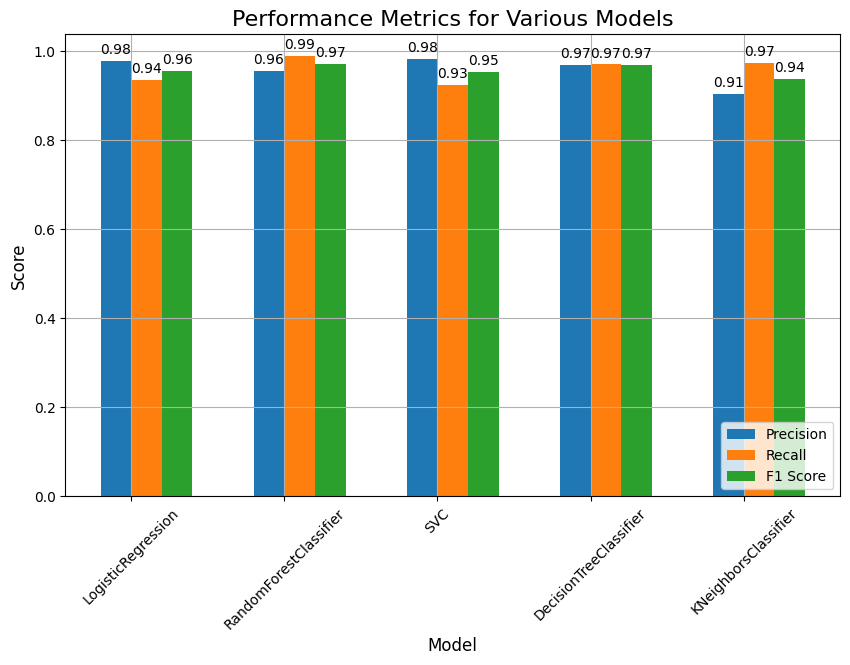

In [81]:
plot_model_performance(results_df)

Hyperparameter tuning with GridSearchCV

In [82]:
def evaluate_model_grid_search(model, X_train, X_test, y_train, y_test):
  if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train)
  if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test)
  model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
  ])
  grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
  grid_search.fit(X_train, y_train)
  best_model = grid_search.best_estimator_
  y_pred = best_model.predict(X_test)

  # Predict probabilities for ROC-AUC (only for models with predict_proba or decision_function)
  if hasattr(model_pipeline, 'predict_proba'):
      y_proba = model_pipeline.predict_proba(X_test)[:, 1]
  elif hasattr(model_pipeline, 'decision_function'):
      y_proba = model_pipeline.decision_function(X_test)
  else:
      y_proba = None
  accuracy =accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  # Calculate ROC-AUC score if possible
  if y_proba is not None:
      roc_auc = roc_auc_score(y_test, y_proba)
  else:
      roc_auc = None
# Calculate confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred)

  #return accuracy, precision, recall, f1, model_pipeline
  #return accuracy, precision, recall, f1, roc_auc, conf_matrix, model_pipeline
  return accuracy, precision, recall, f1,roc_auc, conf_matrix, best_model


In [83]:
param_grids = {
    'LogisticRegression' : {
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['lbfgs', 'liblinear']
    },
    'RandomForestClassifier':{
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [10, 20, None],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'KNeighborsClassifier': {
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    },
    'DecisionTreeClassifier': {
        'classifier__max_depth': [5, 10, 20, None],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'SVC': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
}



In [84]:
metrics = []
models =[log_reg, rf, svm, dt, knn]
model_names = ['LogisticRegression', 'RandomForestClassifier', 'SVC', 'DecisionTreeClassifier', 'KNeighborsClassifier']
for model, model_name  in zip(models, model_names):
  param_grid = param_grids[model_name]
  accuracy, precision, recall, f1,roc_auc, conf_matrix, best_model = evaluate_model_grid_search(model, X_train, X_test, y_train, y_test)
  metrics.append(
      {'Model': model_name,
       'Accuracy': accuracy,
       'Precision': precision,
       'Recall': recall,
       'F1 Score': f1,
       'ROC-AUC': roc_auc,
       'Confusion Matrix': conf_matrix,
       'Best Model': best_model
       }
      )



In [85]:
results_gridsearch_df = pd.DataFrame(metrics)
results_gridsearch_df.set_index('Model', inplace=True)
results_gridsearch_df



,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Confusion Matrix,Best Model
Model,,,,,,,
LogisticRegression,0.937370,0.979248,0.939215,0.958814,0.984339,"[[499, 37], [113, 1746]]","(ColumnTransformer(transformers=[('num', Stand..."
RandomForestClassifier,0.963674,0.966807,0.987090,0.976843,0.993873,"[[473, 63], [24, 1835]]","(ColumnTransformer(transformers=[('num', Stand..."
SVC,0.936534,0.978688,0.938677,0.958265,0.984111,"[[498, 38], [114, 1745]]","(ColumnTransformer(transformers=[('num', Stand..."
DecisionTreeClassifier,0.955324,0.970968,0.971490,0.971229,0.933237,"[[482, 54], [53, 1806]]","(ColumnTransformer(transformers=[('num', Stand..."
KNeighborsClassifier,0.897286,0.898665,0.977945,0.936631,0.913359,"[[331, 205], [41, 1818]]","(ColumnTransformer(transformers=[('num', Stand..."


In [86]:
results_gridsearch_df

,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Confusion Matrix,Best Model
Model,,,,,,,
LogisticRegression,0.937370,0.979248,0.939215,0.958814,0.984339,"[[499, 37], [113, 1746]]","(ColumnTransformer(transformers=[('num', Stand..."
RandomForestClassifier,0.963674,0.966807,0.987090,0.976843,0.993873,"[[473, 63], [24, 1835]]","(ColumnTransformer(transformers=[('num', Stand..."
SVC,0.936534,0.978688,0.938677,0.958265,0.984111,"[[498, 38], [114, 1745]]","(ColumnTransformer(transformers=[('num', Stand..."
DecisionTreeClassifier,0.955324,0.970968,0.971490,0.971229,0.933237,"[[482, 54], [53, 1806]]","(ColumnTransformer(transformers=[('num', Stand..."
KNeighborsClassifier,0.897286,0.898665,0.977945,0.936631,0.913359,"[[331, 205], [41, 1818]]","(ColumnTransformer(transformers=[('num', Stand..."


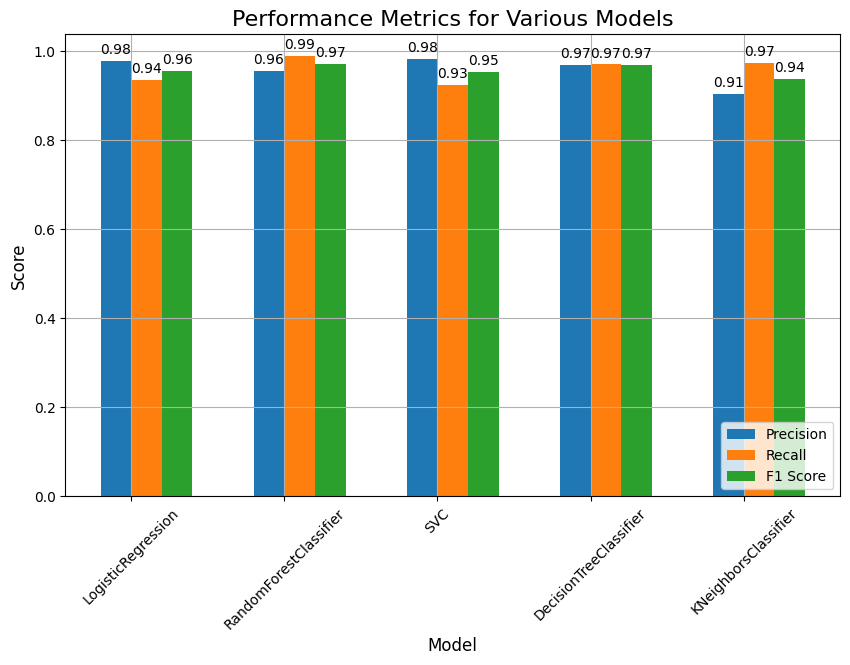

In [87]:
plot_model_performance(results_gridsearch_df)

In [88]:
results_df

,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Confusion Matrix,Best Model
Model,,,,,,,
LogisticRegression,0.934864,0.979718,0.935449,0.957072,0.984339,"[[500, 36], [120, 1739]]","(ColumnTransformer(transformers=[('num', Stand..."
RandomForestClassifier,0.956576,0.955844,0.989779,0.972516,0.993873,"[[451, 85], [19, 1840]]","(ColumnTransformer(transformers=[('num', Stand..."
SVC,0.929436,0.982857,0.925229,0.953173,0.984111,"[[506, 30], [139, 1720]]","(ColumnTransformer(transformers=[('num', Stand..."
DecisionTreeClassifier,0.954071,0.969909,0.970952,0.970430,0.933237,"[[480, 56], [54, 1805]]","(ColumnTransformer(transformers=[('num', Stand..."
KNeighborsClassifier,0.900626,0.905453,0.973642,0.938310,0.913359,"[[347, 189], [49, 1810]]","(ColumnTransformer(transformers=[('num', Stand..."


In [89]:
# Rename columns in result_df to indicate they are after GridSearchCV
results_gridsearch_df = results_gridsearch_df.rename(columns={
    'Accuracy': 'Accuracy (GridSearch)',
    'Precision': 'Precision (GridSearch)',
    'Recall': 'Recall (GridSearch)',
    'F1 Score': 'F1 Score (GridSearch)',
    'ROC-AUC': 'ROC-AUC (GridSearch)',
    'Confusion Matrix': 'Confusion Matrix (GridSearch)',
    'Best Model': 'Best Model (GridSearch)'
})
results_df = results_df.rename(columns={
    'Accuracy': 'Accuracy (Baseline)',
    'Precision': 'Precision (Baseline)',
    'Recall': 'Recall (Baseline)',
    'F1 Score': 'F1 Score (Baseline)',
    'ROC-AUC': 'ROC-AUC (Baseline)',
    'Confusion Matrix': 'Confusion Matrix (Baseline)',
    'Best Model': 'Best Model (Baseline)'
})

# Merge the two dataframes on the 'Model' column
comparison_df = pd.merge(results_gridsearch_df, results_df, on='Model', suffixes=(' (Baseline)', ' (GridSearch)'))
# Use the 'left_on' and 'right_on' arguments to explicitly specify the join columns
#comparison_df = pd.merge(metrics_df, results_df, left_on='Model', right_on='Model', suffixes=(' (Baseline)', ' (GridSearch)')) # Modified line to keep the 'Model' column
# Display the resulting comparison dataframe
comparison_df

,Accuracy (GridSearch),Precision (GridSearch),Recall (GridSearch),F1 Score (GridSearch),ROC-AUC (GridSearch),Confusion Matrix (GridSearch),Best Model (GridSearch),Accuracy (Baseline),Precision (Baseline),Recall (Baseline),F1 Score (Baseline),ROC-AUC (Baseline),Confusion Matrix (Baseline),Best Model (Baseline)
Model,,,,,,,,,,,,,,
LogisticRegression,0.937370,0.979248,0.939215,0.958814,0.984339,"[[499, 37], [113, 1746]]","(ColumnTransformer(transformers=[('num', Stand...",0.934864,0.979718,0.935449,0.957072,0.984339,"[[500, 36], [120, 1739]]","(ColumnTransformer(transformers=[('num', Stand..."
RandomForestClassifier,0.963674,0.966807,0.987090,0.976843,0.993873,"[[473, 63], [24, 1835]]","(ColumnTransformer(transformers=[('num', Stand...",0.956576,0.955844,0.989779,0.972516,0.993873,"[[451, 85], [19, 1840]]","(ColumnTransformer(transformers=[('num', Stand..."
SVC,0.936534,0.978688,0.938677,0.958265,0.984111,"[[498, 38], [114, 1745]]","(ColumnTransformer(transformers=[('num', Stand...",0.929436,0.982857,0.925229,0.953173,0.984111,"[[506, 30], [139, 1720]]","(ColumnTransformer(transformers=[('num', Stand..."
DecisionTreeClassifier,0.955324,0.970968,0.971490,0.971229,0.933237,"[[482, 54], [53, 1806]]","(ColumnTransformer(transformers=[('num', Stand...",0.954071,0.969909,0.970952,0.970430,0.933237,"[[480, 56], [54, 1805]]","(ColumnTransformer(transformers=[('num', Stand..."
KNeighborsClassifier,0.897286,0.898665,0.977945,0.936631,0.913359,"[[331, 205], [41, 1818]]","(ColumnTransformer(transformers=[('num', Stand...",0.900626,0.905453,0.973642,0.938310,0.913359,"[[347, 189], [49, 1810]]","(ColumnTransformer(transformers=[('num', Stand..."


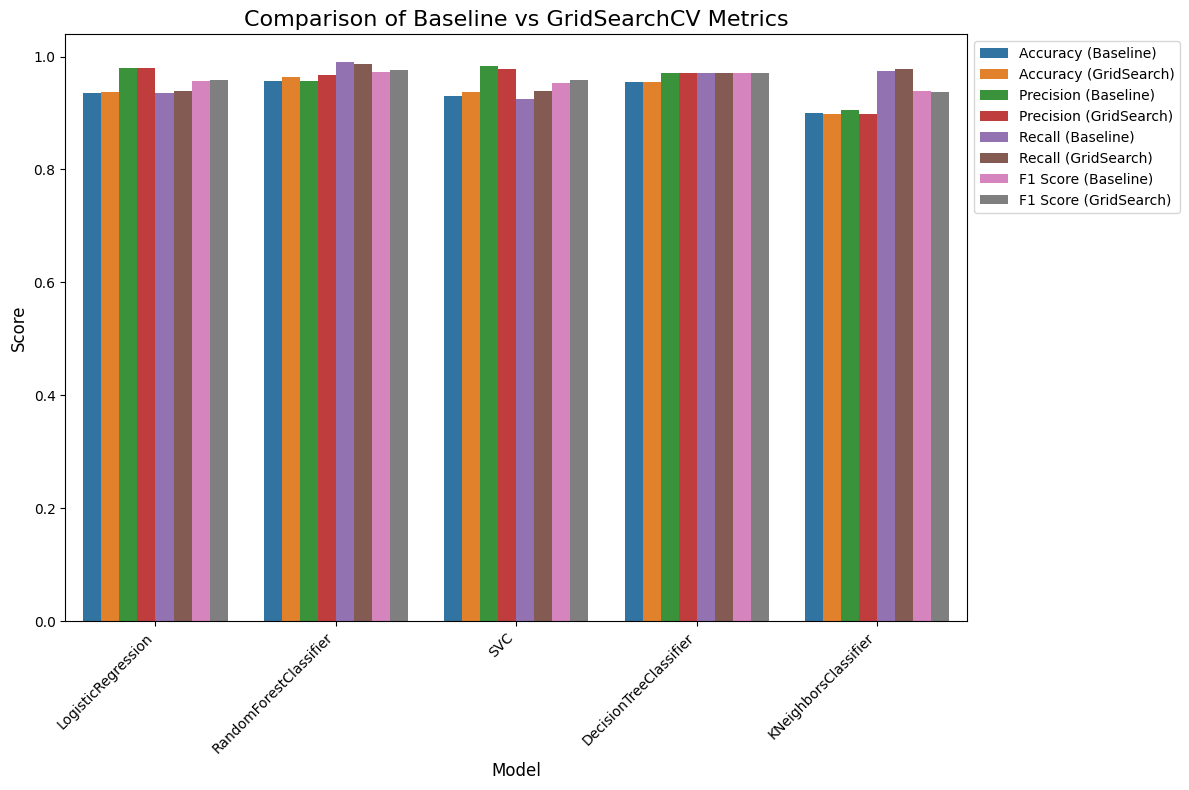

In [90]:
# Check if 'Model' is a column or index
if 'Model' not in comparison_df.columns:
    comparison_df.reset_index(inplace=True)  # Reset index if 'Model' is missing from columns

# Step 1: Melt the dataframe for easier plotting
comparison_melted = comparison_df.melt(
    id_vars='Model',
    value_vars=['Accuracy (Baseline)', 'Accuracy (GridSearch)',
                'Precision (Baseline)', 'Precision (GridSearch)',
                'Recall (Baseline)', 'Recall (GridSearch)',
                'F1 Score (Baseline)', 'F1 Score (GridSearch)'],
    #value_vars=[col for col in comparison_df.columns if col not in ['Model', 'Confusion Matrix (Baseline)', 'Confusion Matrix (GridSearch)', 'Best Model (Baseline)', 'Best Model (GridSearch)']],  # Dynamically select value_vars
    var_name='Metric',
    value_name='Score'
)

# Step 2: Create a bar plot comparing the metrics
plt.figure(figsize=(12, 8))
sns.barplot(data=comparison_melted, x='Model', y='Score', hue='Metric')

# Step 3: Set the labels and title
plt.title('Comparison of Baseline vs GridSearchCV Metrics', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Step 4: Show the plot
plt.legend(loc='best', bbox_to_anchor=(1, 1), fontsize=10)
plt.tight_layout()
plt.show()

In [91]:
#RFE (Recursive Feature Elimination)
from sklearn.feature_selection import RFE
# Initialize the model
log_reg_rfe = LogisticRegression(max_iter=1000)
# Initialize RFE
rfe = RFE(estimator=log_reg_rfe, n_features_to_select=5)  # Select the top 2 features
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection',rfe),
    ('classifier', log_reg_rfe)
])
pipeline.fit(X_train, y_train)
# Get the selected features
selected_features_rfe = rfe.support_

# Convert X_train to a Pandas DataFrame if it's not already
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train)
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test)
# Get the names of the features from the preprocessor
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
selected_feature_names_rfe = feature_names[selected_features_rfe]
print("Selected Features (RFE):", selected_feature_names_rfe)
# Create a DataFrame to display which features were selected
#rfe_results = pd.DataFrame({
#    'Feature': selected_feature_names_rfe,
#    'Selected': selected_features_rfe
#})
#print("RFE Results:")
#print(rfe_results)
# Fit the model with the selected features


Selected Features (RFE): ['num__recoveries' 'num__last_pymnt_amnt' 'num__out_prncp'
 'num__out_prncp_inv' 'num__collection_recovery_fee']


In [92]:
print(X_train.columns)
selected_feature_names_rfe = ['recoveries', 'last_pymnt_amnt' ,'out_prncp',
 'out_prncp_inv', 'collection_recovery_fee']
if all(item in X_train.columns for item in selected_feature_names_rfe): # Changed this line to use a list comprehension with `in` for checking containment.
  print('m')
  X_train_rfe = X_train[selected_feature_names_rfe]
  X_test_rfe = X_test[selected_feature_names_rfe]
  print(X_train_rfe.shape, X_test_rfe.shape)
  log_reg_rfe.fit(X_train_rfe, y_train)

# Evaluate the model
  rfe_accuracy = log_reg_rfe.score(X_test_rfe, y_test)
  print("Model accuracy with RFE-selected features:", rfe_accuracy)

# Predict using the RFE-selected model
  y_pred_rfe = log_reg_rfe.predict(X_test_rfe)

# Calculate the precision score
# Since this is a multi-class classification problem, you need to specify the average method
  precision_rfe = precision_score(y_test, y_pred_rfe, average='weighted')
  recall = recall_score(y_test, y_pred_rfe, average='weighted')
  f1 = f1_score(y_test, y_pred_rfe, average='weighted')
  result_rfe = {
      'model': 'RFE',
      'accuracy': rfe_accuracy,
      'precision': precision_rfe,
      'recall': recall,
      'f1_score': f1
  }
  print('M')
  print(result_rfe)
  print("Precision score with RFE-selected features:", precision_rfe)
  print("Recall score with RFE-selected features:", recall)
  print("F1 score with RFE-selected features:", f1)

Index(['term', 'grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'recoveries', 'last_pymnt_amnt', 'total_pymnt',
       'out_prncp', 'out_prncp_inv', 'collection_recovery_fee', 'int_rate',
       'total_rec_late_fee', 'dti'],
      dtype='object')
m
(9576, 5) (2395, 5)
Model accuracy with RFE-selected features: 0.9102296450939458
M
{'model': 'RFE', 'accuracy': 0.9102296450939458, 'precision': 0.9195356365620276, 'recall': 0.9102296450939458, 'f1_score': 0.9014227470378584}
Precision score with RFE-selected features: 0.9195356365620276
Recall score with RFE-selected features: 0.9102296450939458
F1 score with RFE-selected features: 0.9014227470378584


The metrics did not improve with RFE, hence discarding this step.